# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Criteria and AHP Matrix

In [2]:
# Define the criteria labels
criteria = ["Safety and Fair Play", "Gender Equity", "Popularity & Accessibility", 
            "Sustainability", "Relevance & Innovation", "Inclusivity"]

# Define the AHP matrix
ahp_matrix = pd.DataFrame([
    [1,     7,   5,   6,   5,   6],
    [1/7,   1,   2,   2,   3,   3],
    [1/5, 1/2,   1,   3,   3,   4],
    [1/6, 1/2, 1/3,   1,   2,   2],
    [1/5, 1/3, 1/3, 1/2,   1,   2],
    [1/6, 1/3, 1/4, 1/2, 1/2,   1]
], index=criteria, columns=criteria)

# Display the AHP matrix
print("AHP Matrix:\n", ahp_matrix)

AHP Matrix:
                             Safety and Fair Play  Gender Equity  \
Safety and Fair Play                    1.000000       7.000000   
Gender Equity                           0.142857       1.000000   
Popularity & Accessibility              0.200000       0.500000   
Sustainability                          0.166667       0.500000   
Relevance & Innovation                  0.200000       0.333333   
Inclusivity                             0.166667       0.333333   

                            Popularity & Accessibility  Sustainability  \
Safety and Fair Play                          5.000000             6.0   
Gender Equity                                 2.000000             2.0   
Popularity & Accessibility                    1.000000             3.0   
Sustainability                                0.333333             1.0   
Relevance & Innovation                        0.333333             0.5   
Inclusivity                                   0.250000             0.5   

# Calculate Principal Eigenvalue and Eigenvector

In [3]:
# Calculate eigenvalues and eigenvectors of the AHP matrix
eigvals, eigvecs = np.linalg.eig(ahp_matrix.values)

# Get the index of the largest eigenvalue
max_eigval_index = np.argmax(eigvals)

# Extract the largest eigenvalue and its corresponding eigenvector
principal_eigenvalue = eigvals[max_eigval_index].real  # Largest eigenvalue (real part)
principal_eigenvector = eigvecs[:, max_eigval_index].real  # Corresponding eigenvector (real part)

# Display principal eigenvalue
print("\nPrincipal Eigenvalue:", principal_eigenvalue)


Principal Eigenvalue: 6.43154994445217


# Calculate Consistency Ratio (CR)

In [4]:
# Calculate Consistency Index (CI)
n = len(criteria)  # Number of criteria
CI = (principal_eigenvalue - n) / (n - 1)

# Random Index (RI) values for n=6
RI_values = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49}
RI = RI_values.get(n, 1.24)  # Lookup RI for n=6

# Calculate Consistency Ratio (CR)
CR = CI / RI
print("\nConsistency Ratio (CR):", CR)

# Check for acceptable consistency
if CR < 0.1:
    print("The matrix is consistent.")
else:
    print("The matrix is not consistent; consider revising the judgments.")


Consistency Ratio (CR): 0.06960482975035003
The matrix is consistent.


# Normalize the AHP Matrix

In [5]:
# Normalize the AHP matrix by dividing each column by the column sum
column_sums = ahp_matrix.sum(axis=0)  # Sum each column
normalized_matrix = ahp_matrix / column_sums  # Normalize the matrix

# Display the normalized matrix
print("\nNormalized AHP Matrix:\n", normalized_matrix)


Normalized AHP Matrix:
                             Safety and Fair Play  Gender Equity  \
Safety and Fair Play                    0.532995       0.724138   
Gender Equity                           0.076142       0.103448   
Popularity & Accessibility              0.106599       0.051724   
Sustainability                          0.088832       0.051724   
Relevance & Innovation                  0.106599       0.034483   
Inclusivity                             0.088832       0.034483   

                            Popularity & Accessibility  Sustainability  \
Safety and Fair Play                          0.560748        0.461538   
Gender Equity                                 0.224299        0.153846   
Popularity & Accessibility                    0.112150        0.230769   
Sustainability                                0.037383        0.076923   
Relevance & Innovation                        0.037383        0.038462   
Inclusivity                                   0.028037       

# Calculate Arithmetic Mean Weights

Arithmetic Mean Weights:
Safety and Fair Play           0.492930
Gender Equity                  0.155216
Popularity & Accessibility     0.155060
Sustainability                 0.083984
Relevance & Innovation         0.066167
Inclusivity                    0.046642


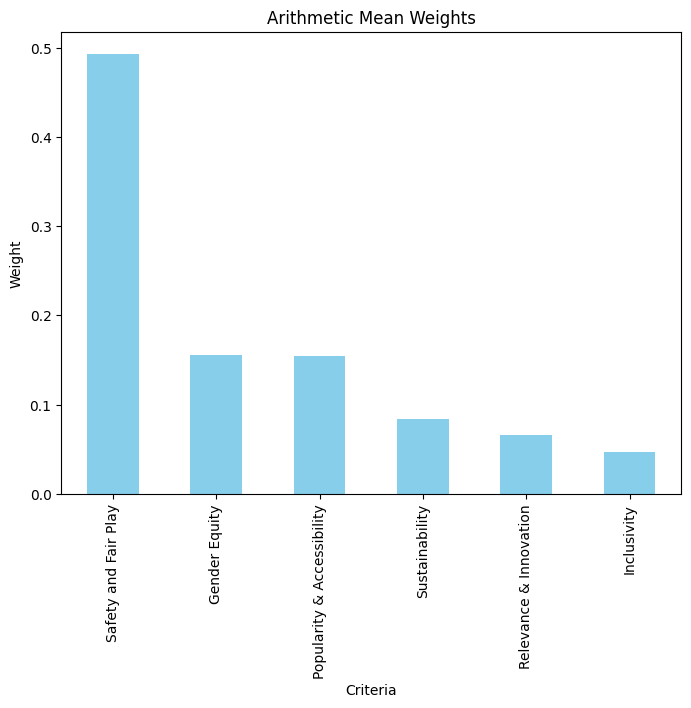

In [6]:
# Calculate weights using the arithmetic mean method
arithmetic_weights = normalized_matrix.mean(axis=1)  # Mean of each row

# Print Arithmetic Mean Weights with custom formatting for left alignment
print("Arithmetic Mean Weights:")
for index, value in zip(arithmetic_weights.index, arithmetic_weights.values):
    print(f"{index:<30} {value:.6f}")  # Left-align index and format value to 6 decimal places

# Plot Arithmetic Mean Weights
plt.figure(figsize=(8, 6))
arithmetic_weights.plot(kind="bar", color="skyblue")
plt.title("Arithmetic Mean Weights")
plt.ylabel("Weight")
plt.xlabel("Criteria")
plt.show()

# Calculate Geometric Mean Weights

Geometric Mean Weights:
Safety and Fair Play           0.507861
Gender Equity                  0.155259
Popularity & Accessibility     0.146298
Sustainability                 0.081937
Relevance & Innovation         0.062659
Inclusivity                    0.045986


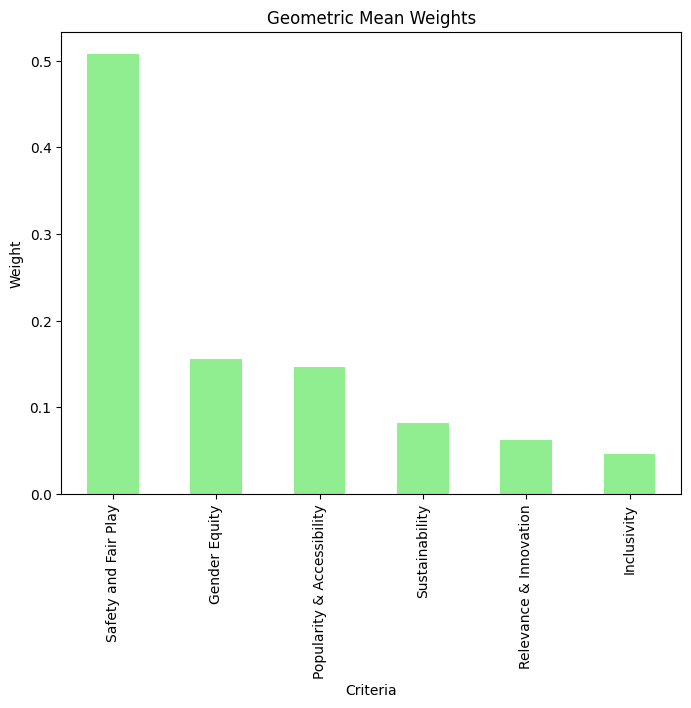

In [7]:
# Calculate weights using the geometric mean method
geometric_mean = ahp_matrix.prod(axis=1) ** (1 / n)  # Product of each row to the power of 1/n
geometric_weights = geometric_mean / geometric_mean.sum()  # Normalize geometric means

# Print Geometric Mean Weights with left-aligned index and custom formatting
print("Geometric Mean Weights:")
for index, value in zip(geometric_weights.index, geometric_weights.values):
    print(f"{index:<30} {value:.6f}")  # Left-align index and format value to 6 decimal places

# Plot Geometric Mean Weights
plt.figure(figsize=(8, 6))
geometric_weights.plot(kind="bar", color="lightgreen")
plt.title("Geometric Mean Weights")
plt.ylabel("Weight")
plt.xlabel("Criteria")
plt.show()

# Calculate Eigenvalue Method Weights

Eigenvalue Method Weights:
Safety and Fair Play           0.520445
Gender Equity                  0.153284
Popularity & Accessibility     0.142828
Sustainability                 0.077760
Relevance & Innovation         0.060961
Inclusivity                    0.044721


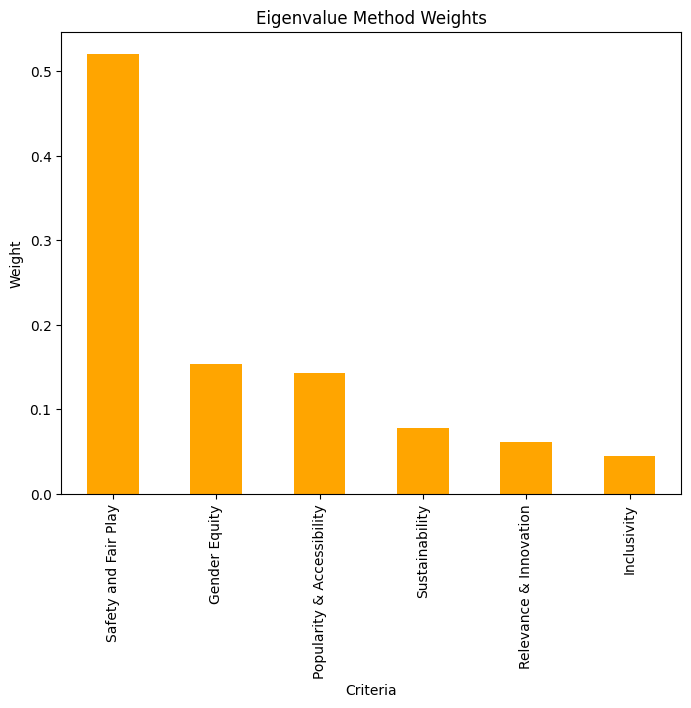

In [8]:
# Normalize the principal eigenvector
eigenvector_weights = principal_eigenvector / principal_eigenvector.sum()
eigenvector_weights_series = pd.Series(eigenvector_weights, index=criteria)

# Print Eigenvalue Method Weights with left-aligned index and custom formatting
print("Eigenvalue Method Weights:")
for index, value in zip(eigenvector_weights_series.index, eigenvector_weights_series.values):
    print(f"{index:<30} {value:.6f}")  # Left-align index and format value to 6 decimal places

# Plot Eigenvalue Method Weights
plt.figure(figsize=(8, 6))
eigenvector_weights_series.plot(kind="bar", color="orange")
plt.title("Eigenvalue Method Weights")
plt.ylabel("Weight")
plt.xlabel("Criteria")
plt.show()

# Combine and Compare Weights

Combined and Average Weights:
Safety and Fair Play           Arithmetic: 0.492930, Geometric: 0.507861, Eigenvalue: 0.520445
Gender Equity                  Arithmetic: 0.155216, Geometric: 0.155259, Eigenvalue: 0.153284
Popularity & Accessibility     Arithmetic: 0.155060, Geometric: 0.146298, Eigenvalue: 0.142828
Sustainability                 Arithmetic: 0.083984, Geometric: 0.081937, Eigenvalue: 0.077760
Relevance & Innovation         Arithmetic: 0.066167, Geometric: 0.062659, Eigenvalue: 0.060961
Inclusivity                    Arithmetic: 0.046642, Geometric: 0.045986, Eigenvalue: 0.044721

Average Weights:
Safety and Fair Play           0.507079
Gender Equity                  0.154587
Popularity & Accessibility     0.148062
Sustainability                 0.081227
Relevance & Innovation         0.063263
Inclusivity                    0.045783


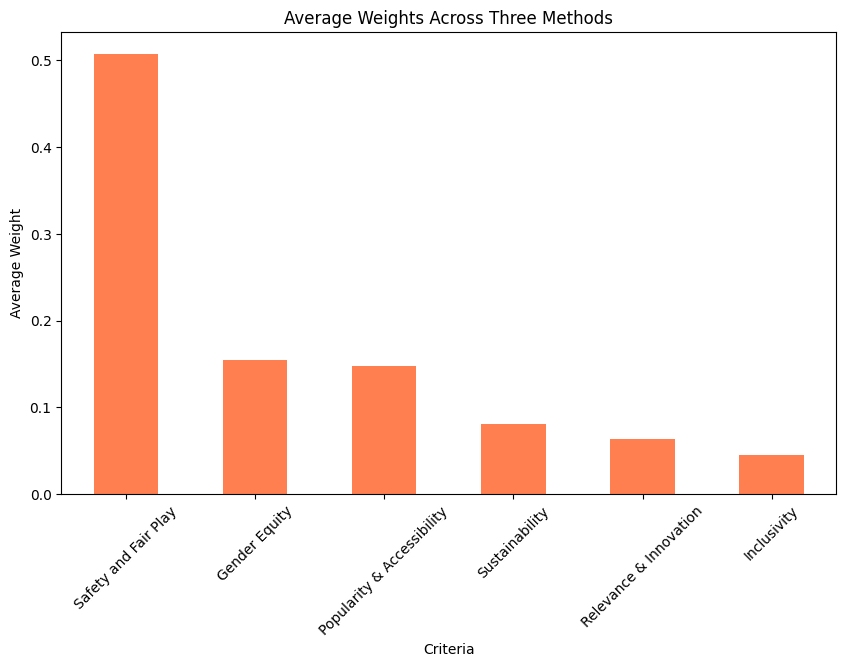

In [9]:
# Combine all weights into a DataFrame
weights_df = pd.DataFrame({
    "Arithmetic Mean": arithmetic_weights,
    "Geometric Mean": geometric_weights,
    "Eigenvalue Method": eigenvector_weights
}, index=criteria)

# Calculate the average weight across the three methods
average_weights = weights_df.mean(axis=1)

# Print Combined Weights with left-aligned index and custom formatting
print("Combined and Average Weights:")
for index, row in weights_df.iterrows():
    print(f"{index:<30} Arithmetic: {row['Arithmetic Mean']:.6f}, Geometric: {row['Geometric Mean']:.6f}, Eigenvalue: {row['Eigenvalue Method']:.6f}")
print("\nAverage Weights:")
for index, value in zip(average_weights.index, average_weights.values):
    print(f"{index:<30} {value:.6f}")

# Plot Average Weights
plt.figure(figsize=(10, 6))
average_weights.plot(kind="bar", color="coral")
plt.title("Average Weights Across Three Methods")
plt.ylabel("Average Weight")
plt.xlabel("Criteria")
plt.xticks(rotation=45)
plt.show()